# Predict World Happiness from 2015-2017 (Multiple Linear Regression)

Question:
1. Describe and clean the data (EDA)
1. Make a predictive model to calculate the world's happiness score.

In [44]:
# load up all necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import os
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from chart_studio.plotly import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
import statsmodels.formula.api as stats
from statsmodels.formula.api import ols

In [45]:
# load all dataset to be used.
world_happiness_2015 = pd.read_csv("2015.csv")
world_happiness_2016 = pd.read_csv("2016.csv")
world_happiness_2017 = pd.read_csv("2017.csv")

In [46]:
# print first 5 of 2016 to have a view of the data set
world_happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [47]:
# print first 5 of 2015 data frame to have a view of the data set
world_happiness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [48]:
# print first 5 of 2015 data frame to have a view of the data set
world_happiness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [49]:
# concatinate the three dataset to a single data set
con_world_happiness = [world_happiness_2015, world_happiness_2016, world_happiness_2017]
combined_world_happiness = pd.concat(con_world_happiness)
print("Done")
# print our single data to have a view of the data set.
combined_world_happiness.head()

Done


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Health..Life.Expectancy.,Trust..Government.Corruption.,Dystopia.Residual
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Data Exporation 
combined_world_happiness.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Lower Confidence Interval',
       'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score',
       'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.',
       'Health..Life.Expectancy.', 'Trust..Government.Corruption.',
       'Dystopia.Residual'],
      dtype='object')

After combinig the data set its observed that we have so many missing and unwanted values and columns. We have todrop these columns and ether replace the values.

In [51]:
# create a variable name to drop columns we wont be needing.
drop_columns = ["Region", "Standard Error", "Lower Confidence Interval", "Upper Confidence Interval",
                "Happiness.Rank", "Happiness.Score", "Whisker.high", "Whisker.low", "Economy..GDP.per.Capita.",
                "Health..Life.Expectancy.", "Trust..Government.Corruption.", "Dystopia.Residual"]

# create a new data frame from the dataset and drop all columns not needed.
new_combined_world_happiness = combined_world_happiness.drop(drop_columns, axis= 1)
print("Successful")

Successful


In [52]:
# Create a visual that gives a more appealing view of where each country is placed in the world ranking report.
data = dict(type = "choropleth", locations = new_combined_world_happiness["Country"],
            locationmode= "country names", z = new_combined_world_happiness["Happiness Rank"], 
            text = new_combined_world_happiness["Country"], colorscale = "viridis")

layout = dict(title = "Happiness Rank Across The world")
fig= go.Figure(data = [data], layout = layout)
iplot(fig)

In [53]:
# explore the new dataframe for missing datas and drop them.
new_combined_world_happiness.info()
new_combined_world_happiness.isna().sum()

# Remove rows with any NaN values
new_combined_world_happiness.dropna(inplace=True)
new_combined_world_happiness.head()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 154
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        470 non-null    object 
 1   Happiness Rank                 315 non-null    float64
 2   Happiness Score                315 non-null    float64
 3   Economy (GDP per Capita)       315 non-null    float64
 4   Family                         470 non-null    float64
 5   Health (Life Expectancy)       315 non-null    float64
 6   Freedom                        470 non-null    float64
 7   Trust (Government Corruption)  315 non-null    float64
 8   Generosity                     470 non-null    float64
 9   Dystopia Residual              315 non-null    float64
dtypes: float64(9), object(1)
memory usage: 40.4+ KB


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [54]:
new_combined_world_happiness.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,79.238095,5.378949,0.899837,0.892647,0.594054,0.399896,0.140532,0.239957,2.212032
std,45.538922,1.141531,0.410780,0.286718,0.240790,0.150684,0.115490,0.130077,0.558728
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.000000,4.510000,0.594900,0.739880,0.419645,0.295890,0.061315,0.151430,1.884135
50%,79.000000,5.286000,0.973060,0.937930,0.640450,0.413190,0.106130,0.218540,2.211260
75%,118.500000,6.269000,1.229000,1.087360,0.787640,0.516730,0.178610,0.311450,2.563470
max,158.000000,7.587000,1.824270,1.402230,1.025250,0.669730,0.551910,0.819710,3.837720


Find out the correlation between Happiness Score and Happiness Rank using a scatterplot graph. where Happiness score is the independent vriable or (predictore) while happiness rank is the dependent variable.

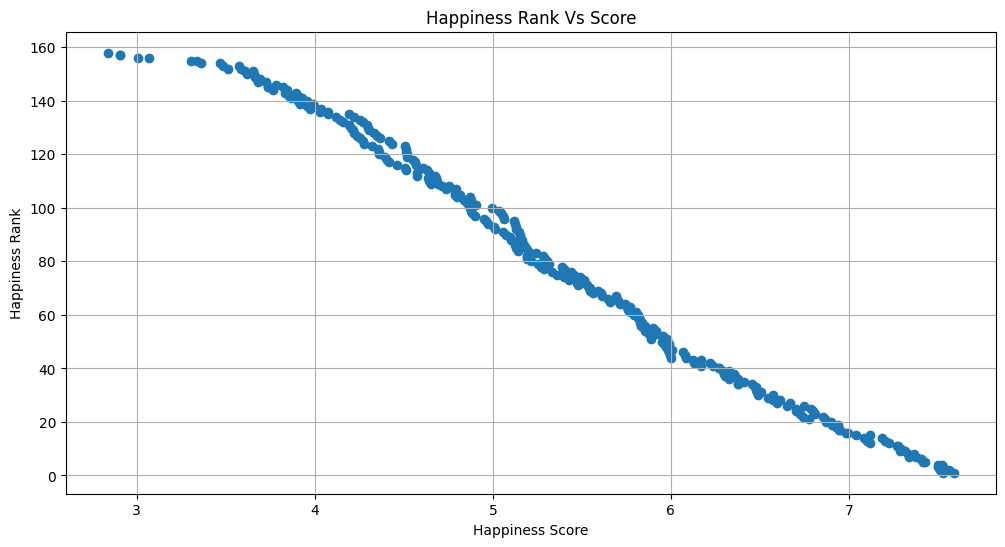

In [55]:
# using matlibplot to plot to determine the correlations
x = new_combined_world_happiness.iloc[::,2].values # locate happiness score column and values
y = new_combined_world_happiness.iloc[::,1].values # locate happiness rank column and values

plt.figure(figsize=(12, 6)) 
plt.scatter(x,y)
plt.title('Happiness Rank Vs Score')
plt.xlabel('Happiness Score')
plt.ylabel('Happiness Rank')
plt.grid(True)
plt.show()

The graph shows that there is a corrolation between the two variables as they are tightly less difference between them.
We may chose to drop Happiness Rank.
* Happiness score and Happiness rank are nagatively correlated(when score increases, rank decreases).

In [56]:
# drop happiness rank and also some categorical variables like "country"
dropped_country = new_combined_world_happiness.drop(["Country","Happiness Rank"], axis=1)
dropped_country.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Now we can see the most collorated using the heatmap and figues attached to them and so now we can tell what columns makes more sense to our task 

In [57]:
# rename the dataset and prepare to train and test the data
train_happy_world_df = dropped_country
train_happy_world_df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


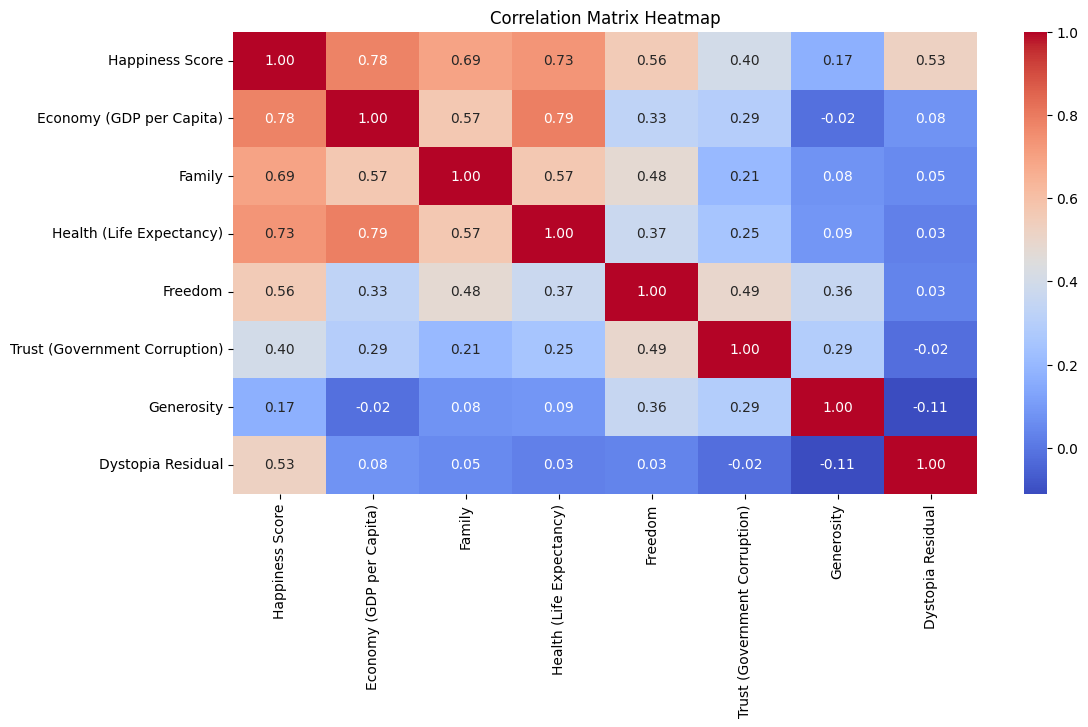

In [58]:
dropped_country = new_combined_world_happiness.drop(["Country","Happiness Rank"], axis=1)
corrolation_heatmap = dropped_country.corr()
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.heatmap(corrolation_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
x = train_happy_world_df.drop("Happiness Score", axis= 1) # keeping all independent variables on x
y = train_happy_world_df["Happiness Score"] # making y store just the dependendent variable

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80)

print ("Training data:",x_test.shape, y_train.shape) 
print ("Test data:",x_test.shape, y_test.shape)

Training data: (63, 7) (252,)
Test data: (63, 7) (63,)


In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [61]:
y_pred = model.predict(x_test)

# create a table that calculates the difference between the predict values and actual values
result_model = pd.DataFrame({"Actual": y_test, "Predict": y_pred})
result_model["Difference"] = y_test - y_pred
result_model.head()

,Actual,Predict,Difference
156,2.905,2.904572,0.000428
148,3.667,3.667225,-0.000225
59,5.791,5.790619,0.000381
127,4.332,4.332122,-0.000122
46,5.984,5.983698,0.000302


In [62]:
# The coefficients
print("Estimated Intercept is: ", model.intercept_)
# The coefficients
print('Coefficients: \n', model.coef_)

Estimated Intercept is:  8.477963688946488e-05
Coefficients: 
 [1.00005202 0.99999745 0.99985509 0.99991623 0.99981726 1.00013159
 0.99999028]


In [63]:
# create a table that takes in all columus and gives the coefficients

coef_df = pd.DataFrame(list(zip(x.columns, model.coef_)),columns= ["Features", "Coefficients"])
coef_df

,Features,Coefficients
0,Economy (GDP per Capita),1.000052
1,Family,0.999997
2,Health (Life Expectancy),0.999855
3,Freedom,0.999916
4,Trust (Government Corruption),0.999817
5,Generosity,1.000132
6,Dystopia Residual,0.999990


In [64]:
# to find out if our model is accuratly in a good fit.
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# variance score: 1 means its a perfect prediction
print("Variance Score: %.2f " % model.score(x_test, y_test))

Mean Absolute Error:  0.00022473979380240679
Mean Squared Error:  7.226857849743146e-08
Root Mean Squared Error:  0.0002688281579325935
Variance Score: 1.00 


<Figure size 1200x600 with 0 Axes>

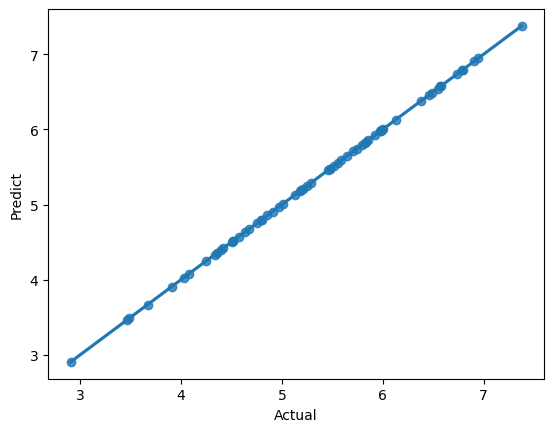

<Figure size 1200x600 with 0 Axes>

In [65]:
sns.regplot(x= "Actual", y= "Predict", data = result_model) 
plt.figure(figsize=(12, 6))
